<a href="https://colab.research.google.com/github/hy05sprsea/C-demo/blob/master/KIKAGAKU_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92(%E5%9B%9E%E5%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **重回帰分析の実装**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# データセットの読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [7]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [8]:
df = pd.DataFrame(x, columns=columns)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [9]:
df['Target'] = t
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [10]:
# 入力変数と目的変数の切り分け
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 2 つに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [13]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# 学習後のパラメータ w 
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

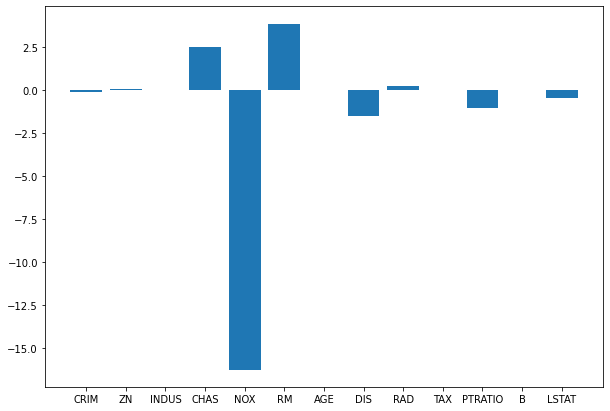

In [16]:
# パラメータの分布をヒストグラムで可視化
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [17]:
model.intercept_

37.93710774183309

In [18]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942549
test score :  0.6733825506400171


In [19]:
# 推論
y = model.predict(x_test)

In [21]:

print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576915
目標値:  22.6


# **Ridge回帰**
Ridge 回帰は重回帰分析に対して重みの 2 乗で表現される L2L2 ノルムを用いて正則化を行うことで、モデルの過度な複雑さに罰則を課して過学習を抑制する手法

In [22]:
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [24]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [25]:
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7623440182689594
test score :  0.6665819091486688


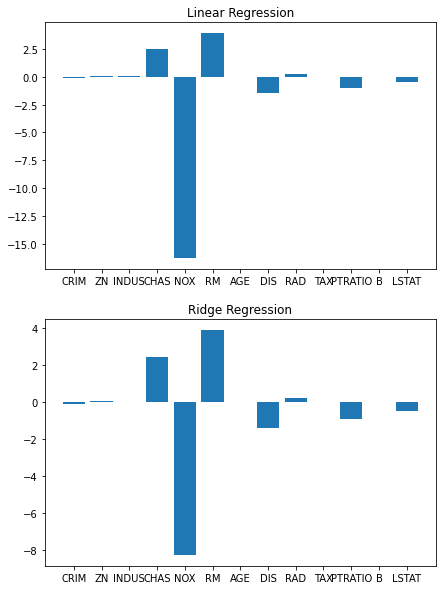

In [26]:
# 箱を準備
fig = plt.figure(figsize=(7, 10))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression');

In [27]:
# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [28]:
# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [29]:
# モデルの検証
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.7084095500978869
test score :  0.6115433359595555


In [30]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso の特徴量 : ', np.sum(lasso.coef_ != 0))

元の特徴量の数 :  13
Lasso の特徴量 :  10


In [31]:
# アルファを変更してみる
lasso_005 = Lasso(alpha=0.05)
lasso_005.fit(x_train, t_train)

print('train score : ', lasso_005.score(x_train, t_train))
print('test score : ', lasso_005.score(x_test, t_test))

train score :  0.7548928631432029
test score :  0.6541502573235292


In [32]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso005 の特徴量 : ', np.sum(lasso_005.coef_ != 0))

元の特徴量の数 :  13
Lasso005 の特徴量 :  12


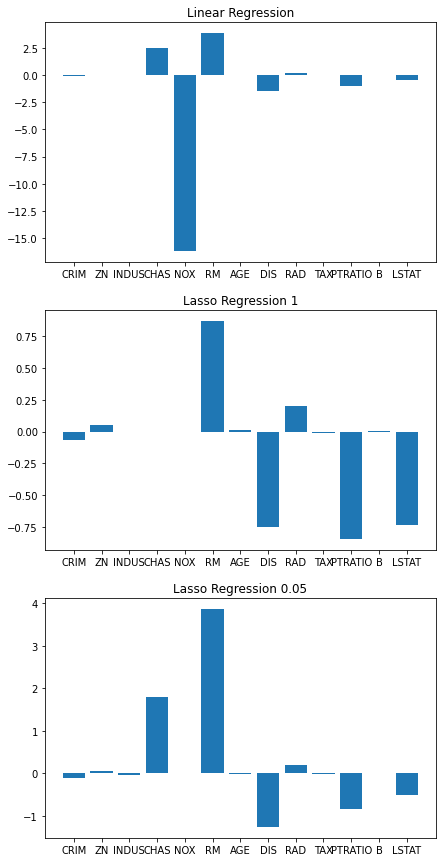

In [33]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# lasso
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_005
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso Regression 0.05');

# **相関関係と多重共線性問題**

In [36]:
df = pd.read_csv('regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,9.222222,-0.333333,9.222222,0.333333,2.803039,29.019550,3.577350,2.485599,2.485599,1.732051,0.992799,0.992799,0.610650,0.610650,0.0,0.0,0.0,0.0,-0.53,3.245112,3.47,0.874858,1.156009,24.605606,5.733667,0.0,0.0,5.90718,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,4.597222,1.652778,4.597222,1.652778,1.632993,2.754888,2.707107,2.077350,2.077350,1.414214,0.788675,0.788675,0.288675,0.288675,0.0,0.0,0.0,0.0,-0.08,2.754888,2.92,1.920000,1.920000,19.599140,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,9.000000,-0.833333,9.000000,0.833333,2.803039,27.019550,3.577350,2.355462,2.355462,1.732051,0.927731,0.927731,0.519018,0.519018,0.0,0.0,0.0,0.0,-0.53,3.245112,3.47,0.874858,1.156009,24.059949,5.106527,0.0,0.0,0.00000,5.969305,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df.shape

(1290, 197)